# Customer churn analysis for gym chain

# Table of Contents <a id='back'></a>

* [Step 1. Download the data](#data_review)
* [Step 2. Carry out exploratory data analysis](#data_preprocessing)
    * [2.1 Mean feature values in two groups](#mean_values)
    * [2.2 Bar histograms and feature distributions left and stayed](#bar_histograms)
    * [2.3 Correlation matrix](#matrix)
* [Step 3. Build a model to predict user churn](#churn_predict)
    * [3.1 Accuracy, precision, recall and other metrics for both models](#metrics)
    * [3.2 Which model gave better results?](#better_results)
* [Step 4. Create user clusters](#user_clusters)
    * [4.1 Standardize the data](#standard)
    * [4.2 Matrix of distances](#matrix_distances)    
    * [4.3 Train the clustering model with the K-means algorithm](#k_means)
    * [4.4 Mean feature value for clusters](#mean_clusters)
    * [4.5 Distributions of features for the clusters](#distributions_clusters) 
    * [4.6 Calculate the churn rate for each cluster](#churn_clusters)    
* [Step 5. Conclusions and basic recommendations](#conclusions)

The project is about a gym chain Model Fitness which is developing a customer interaction strategy based on analytical data.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.

Model Fitness provided us with CSV files containing data on churn for a given month and information on the month preceding it.

We should:

- Learn to predict the probability of churn (for the upcoming month) for each customer

- Draw up typical user portraits: select the most outstanding groups and describe their main features

- Analyze the factors that impact churn most


- Draw basic conclusions and develop recommendations on how to improve customer service:

* Identify target groups

* Suggest measures to cut churn

* Describe any other patterns you see with respect to interaction with customers

# Step 1. <a class="anchor" id="data_review"></a>Downloading the data

In [139]:
# Loading all the libraries
import pandas as pd
import seaborn as sns
import time
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [140]:
# Load the data
try:
    gym = pd.read_csv('gym_churn_us.csv')
except:
    gym = pd.read_csv('/datasets/gym_churn_us.csv')

**Description of the data**

The dataset includes the following fields:

- **Churn** — the fact of churn for the month in question

Current dataset fields:
User data for the preceding month

- **gender** 

- **Near_Location** - whether the user lives or works in the neighborhood where the gym is located

- **Partner** - whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

- **Phone** - whether the user provided their phone number

- **Age**

- **Lifetime** - the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status

- **Contract_period** - 1 month, 3 months, 6 months, or 1 year

- **Month_to_end_contract** - the months remaining until the contract expires

- **Group_visits'** - whether the user takes part in group sessions

- **Avg_class_frequency_total** - average frequency of visits per week over the customer's lifetime

- **Avg_class_frequency_current_month** - average frequency of visits per week over the preceding month

- **Avg_additional_charges_total** - the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.



[To the Table of Contents](#back)   

# Step 2. Carry out exploratory data analysis (EDA) <a id='data_preprocessing'></a>

In [141]:
# obtaining the first 10 rows from the gym table
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [142]:
# obtaining general information about the data in gym
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

The table contains 14 columns, 4 of them float and 10 - integer.

No missing values were identified.

Let's study the mean values and standard deviation (use the describe() method).

In [143]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


There are several binary values in the dataset (gender, Near_location, Partner, Promo_friends, Phone, Group_visits, Churn). Mean of a binary feature is equal to the frequency of the value 1. Standard deviation reaches a maximum when both binary values are equally probable.

Features Gender and Partner with mean value 0.51 and 0.48 - correspond to an almost equiprobable distribution, feature Near_location has an average value of 0.84, features Promo_friends - 0.3, Phone - 0.9, Group_visits - 0.41 and Churn- 0.26.

Feature Age has an almost normal distribution.

For features Contract_period, Month_to_end_contract, Lifetime the average value is practically equal to standard deviation, that means that the distribution is positively skewed.


Additional_charges_total, Avg_class_frequency_total and Avg_class_frequency_current_month - in these cases, the mean is 1.5-2 times higher than the standard deviation.

**Mean feature values in two groups** <a id='mean_values'></a>

Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [144]:
gym.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Women and men (Gender) are represented in these groups approximately equally. 

The proximity of localization (Near_location) is only slightly higher for those who stayed. And the average value for the attributes Partner,Promo_friends, Contract_period,Group_visits, Additional_charges_total,Month_to_end_contract, Lifetime,Avg_class_frequency_total, Avg_class_frequency_current_month is higher in the group of those who continued to come to the gym.

As for Age those that stayed are a little older than those that left.

**Bar histograms and feature distributions left and stayed** <a id='bar_histograms'></a>

Plot bar histograms and feature distributions for those who left (churn) and those who stayed.


In [145]:
def churn_stat(type):
    fig, ax = plt.subplots(figsize=(6,5))
    ax = sns.histplot(gym, x=type, hue="Churn")
    plt.suptitle('Feature distributions')
    plt.show()
   

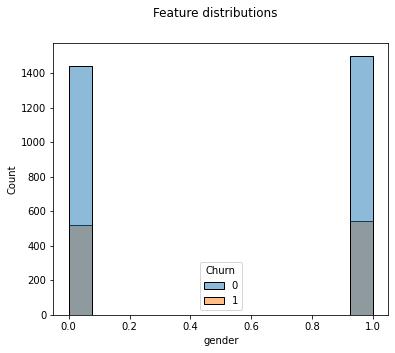

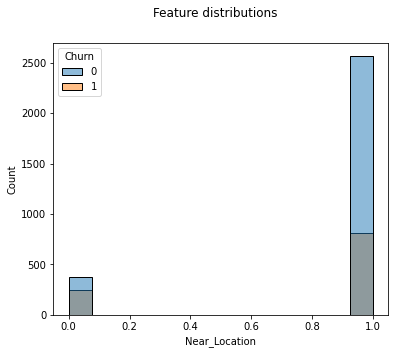

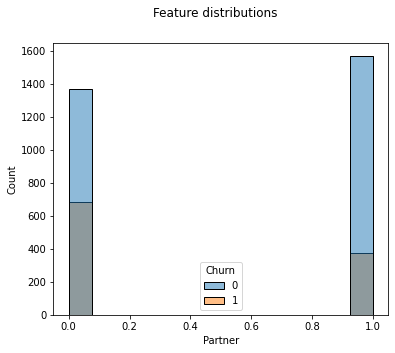

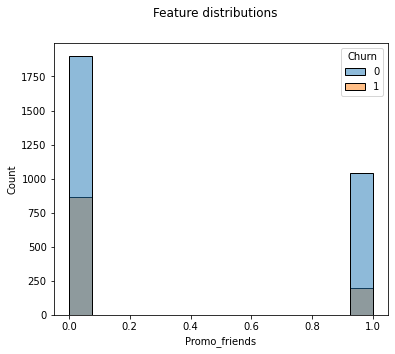

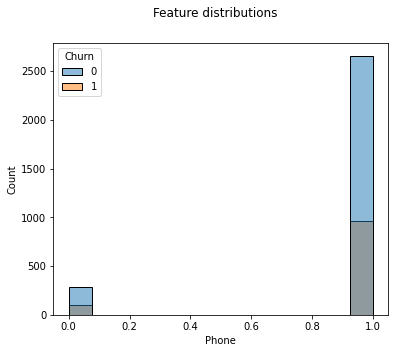

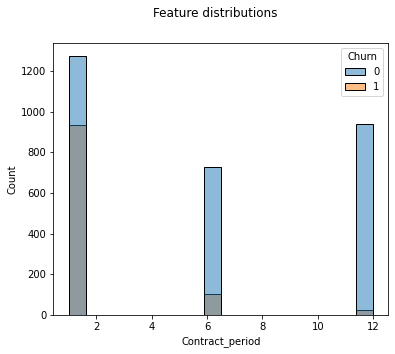

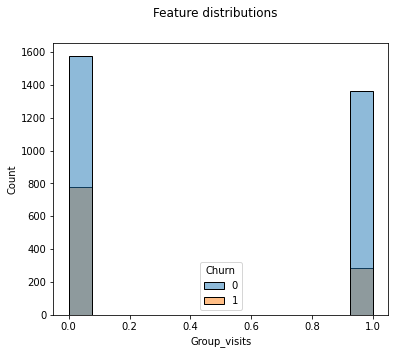

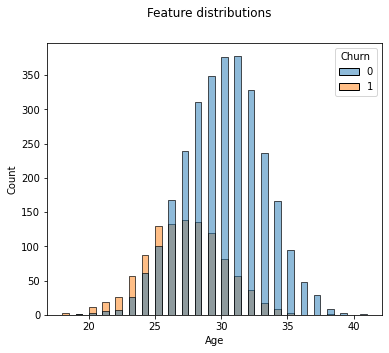

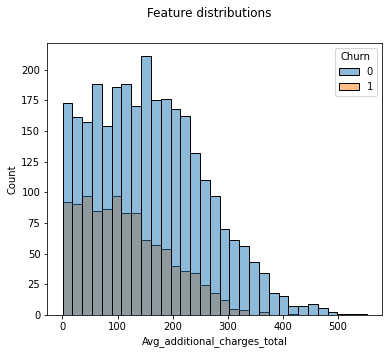

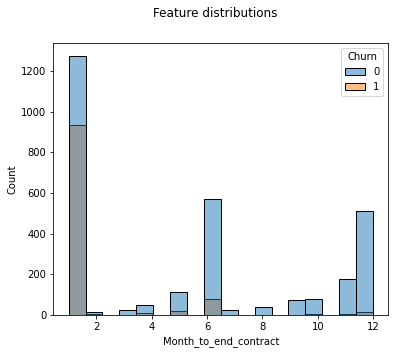

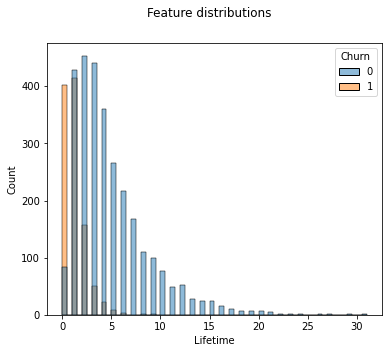

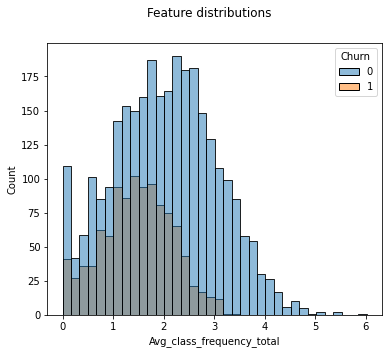

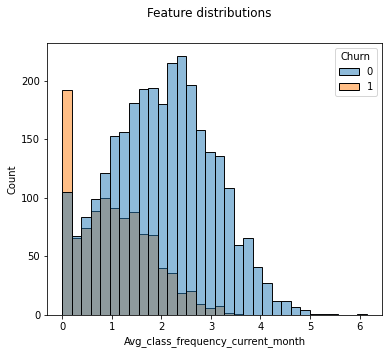

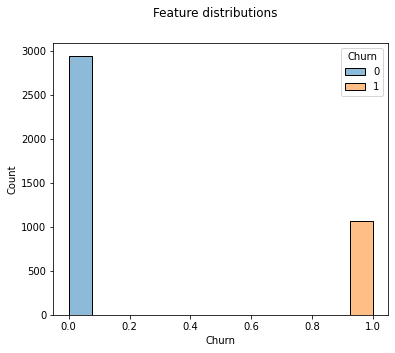

In [146]:
for col in gym:
    churn_stat(col)

From the plots above we can make the following conclusions:

Men and women in both groups are represented  equally. The proximity to the gym stimulates attendance, as well as the discounts from the partner employer. 

The majority of users provide the phone numer, the contract is longer for those who stayed. Left ones are younger a little and spend less money on additional services. They also go to the gym a little less often when they were going. 

**Correlation matrix**  <a id='matrix'></a>

Build a correlation matrix and display it.

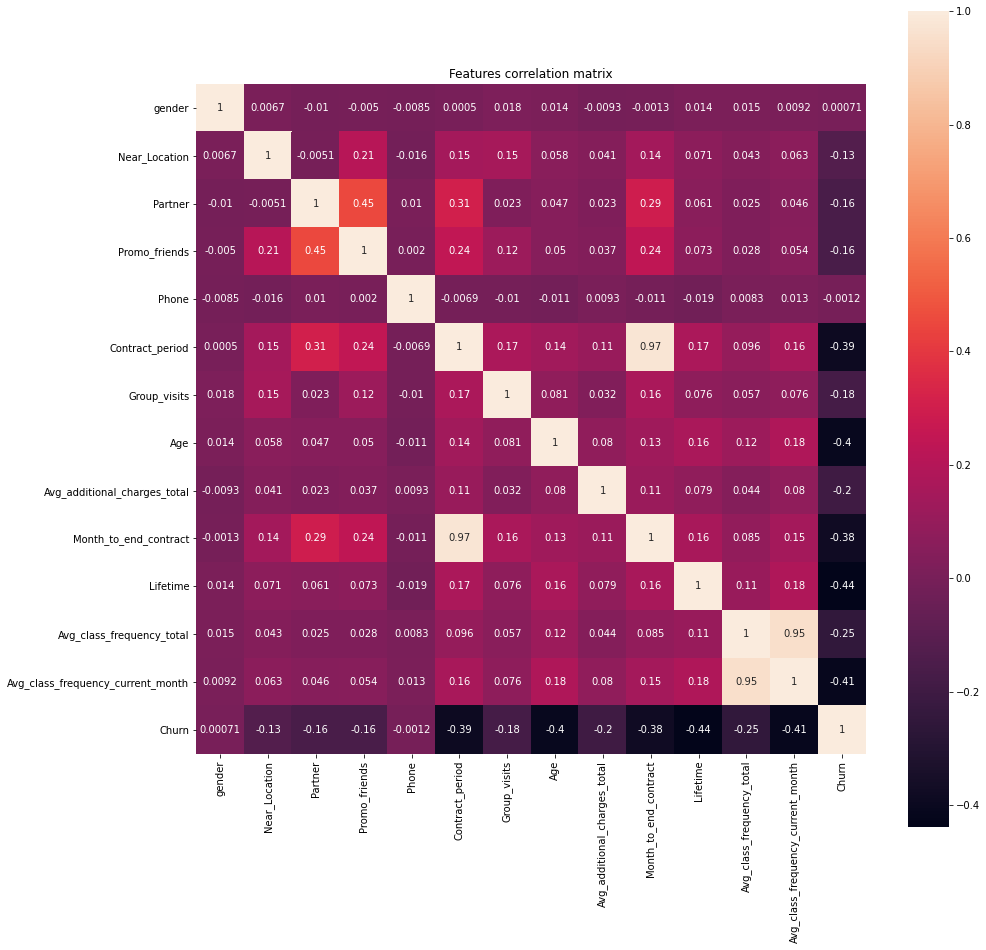

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(gym.corr(), annot = True, square = True)
plt.title('Features correlation matrix')
plt.show()

There are 2 pairs of correlated features Avg_class_frequency_total - Avg_class_frequency_current_month and Contract_period - Month_to_end_contract. There is no need to drop them. For ensembles correlated features are not a problem.

[To the Table of Contents](#back)   

# Step 3. Build a model to predict user churn <a id='churn_predict'></a>

Build a binary classification model for customers where the target feature is the user's leaving next month.
Divide the data into train and validation sets using the train_test_split() function

In [148]:
X = gym.drop('Churn', axis=1)
y = gym['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Train the model on the train set with two methods:

- logistic regression

- random forest

In [149]:
lr_model = LogisticRegression(random_state=0, solver = 'liblinear')
rf_model = RandomForestClassifier(random_state=0, n_estimators = 100)

models = {'LogisticRegression' : lr_model, 'RandomForestClassifier' : rf_model}

Train the model on the train set with method Logistic regression method:

In [150]:
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test) 
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

Training the model on the train set with Random Forest method:

In [151]:
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

**Accuracy, precision, recall and other metrics for both models** <a id='metrics'></a>

Evaluate accuracy, balanced accuracy, precision, recall, f1 and ROC_AUC for both the models using the validation data

**Accuracy** - the share of accurate predictions among all predictions **(TP+TN)/(TP+FP+TN+FN)**   
Accuracy only works when classes are balanced, i.e. when objects are distributed almost evenly between the classes, approximately 50/50. So we can use **balanced accuracy**   
**Precision** - the share of correct answers only in the target class  **TP/(TP+FP)**   
**Recall** - ability of the classifier to find all the positive samples  **TP/(TP+FN)**   
**F1 Score** = **2 * precision * recall/(precision+recall)**   
**ROC_AUC** - Receiver Operating Characteristic and Area Under Curve. 

In [152]:
#let's write functions for metric calculation
def metrics_value(model, X_test, y_test):
    return [round(accuracy_score(y_test,model.predict(X_test)),2),
            round(balanced_accuracy_score(y_test,model.predict(X_test)),2),
            round(precision_score(y_test,model.predict(X_test)),2),
            round(recall_score(y_test,model.predict(X_test)),2),
            round(f1_score(y_test,model.predict(X_test)),2),
            round(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]),2)]

In [153]:
metrics_names = ['Accuracy','Balanced accuracy','Precision','Recall','F1','ROC_AUC']
metrics = pd.DataFrame(index = metrics_names)

**Which model gave better results?** <a id='better_results'></a>

In [154]:
#Comparing metrics for both trained models
for name, model in models.items():
    metrics[name] = metrics_value(model, X_test, y_test)
metrics

,LogisticRegression,RandomForestClassifier
Accuracy,0.92,0.92
Balanced accuracy,0.89,0.88
Precision,0.86,0.84
Recall,0.83,0.82
F1,0.85,0.83
ROC_AUC,0.97,0.97


Both models show high results, but LogisticRegression gave the best ones. 

[To the Table of Contents](#back)   

# Step 4. Create user clusters <a id='user_clusters'></a>

Set aside the column with data on churn and identify object (user) clusters:

**Standardize the data** <a id='standard'></a>

In [155]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(gym.drop('Churn', axis=1)) 

**Matrix of distances** <a id='matrix_distances'></a>

Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

In [156]:
linked = linkage(X_sc, method = 'ward') 
linked[:5]

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       [2.10100000e+03, 3.77300000e+03, 1.44188037e-01, 2.00000000e+00],
       [7.50000000e+01, 1.64600000e+03, 1.46525871e-01, 2.00000000e+00]])

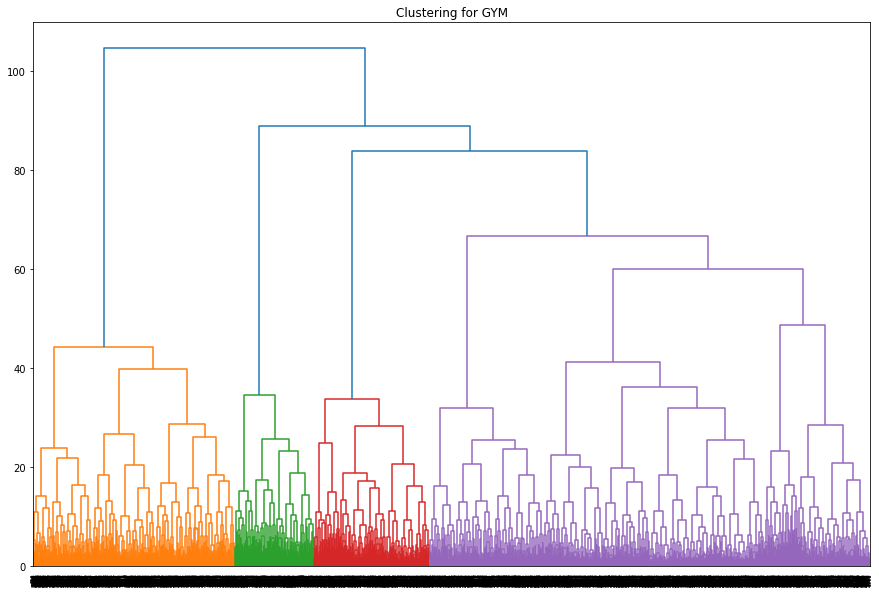

Time in seconds to build this dendrogram - 127


In [157]:
#dendrogram building

start = time.time()

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', truncate_mode = 'level')
plt.title('Clustering for GYM')
plt.show() 

end = time.time()

print('Time in seconds to build this dendrogram - {}'.format(round(end - start)))

The optimal number of clusters is 4 which is corresponds to the four different colors on the plot.

**Train the clustering model with the K-means algorithm** <a id='k_means'></a>

Train the clustering model with the K-means algorithm and predict customer clusters. Optimal number of clusters n=4.

In [158]:
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(X_sc)
gym['cluster'] = labels
print('Clusters:\n', \
      gym.groupby('cluster')['gender'].agg({lambda x: 100*x.count()/len(gym),'count'}). \
      rename(columns={'<lambda_0>':'%','count':'Count'}))

Clusters:
               %  Count
cluster               
0         9.650    386
1        36.975   1479
2        26.425   1057
3        26.950   1078


Users are not evenly distributed into clusters.

**Mean feature values for clusters** <a id='mean_clusters'></a>

Look at the mean feature values for clusters. Does anything catch your eye?

In [159]:
gym.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590,0.559838
2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132,0.092715
3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685


Gender: the distribution across clusters is almost even - a little more gender 1 in clusters 0 and 2, and a little more gender 0 in cluster 1. 

A clear superiority for the Partner and Promo_friends features for cluster 3. None of the users from cluster 0 doesn't provide phone number. 

The longest Contract_period, Month_to_end_contract is in cluster 3. The average value of Age in all 4 clusters is 28-30 years old. 

Additional_charges_total is higher, for cluster 3. Lifetime is approximately the same for clusters 2 and 3, and the shortest for cluster 1. The highest attendance is in cluster 2. The cluster most prone to churn is 1.

**Distributions of features for the clusters** <a id='distributions_clusters'></a>

Plot distributions of features for the clusters. Do you notice anything?

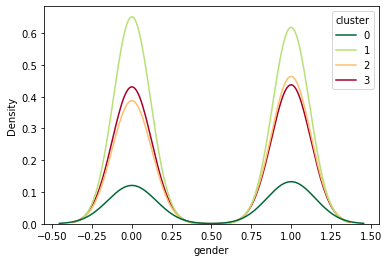

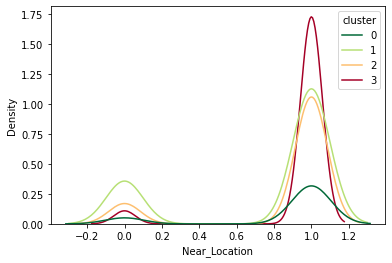

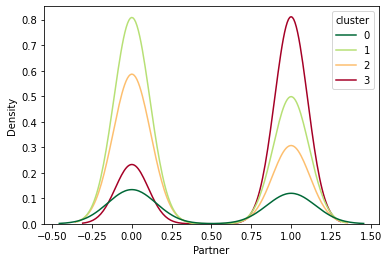

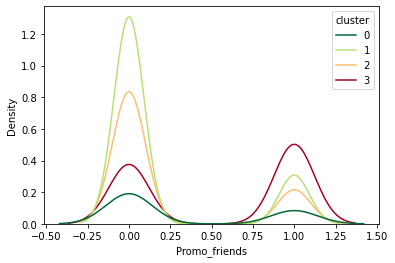

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



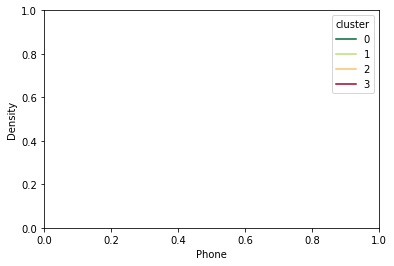

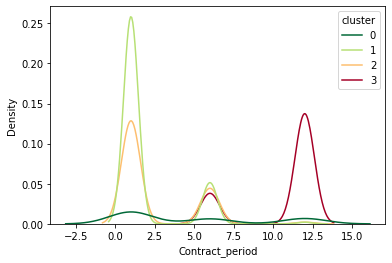

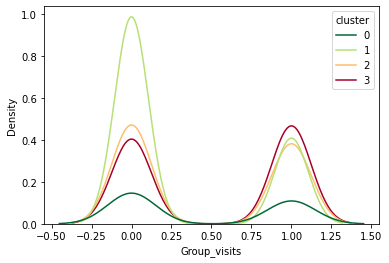

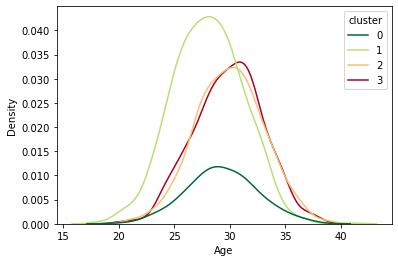

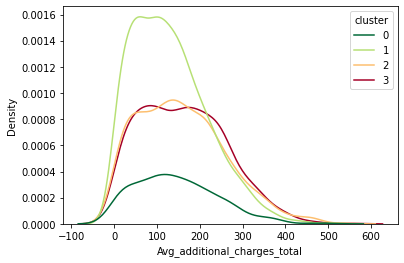

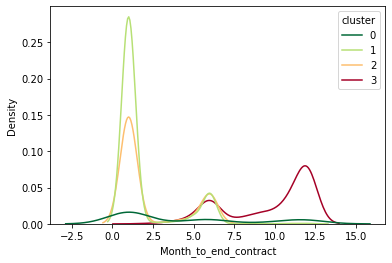

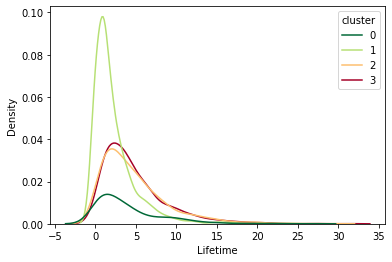

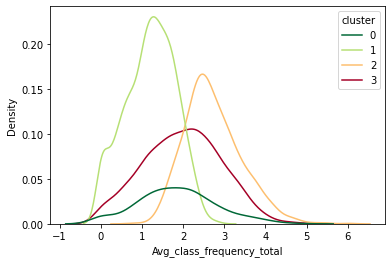

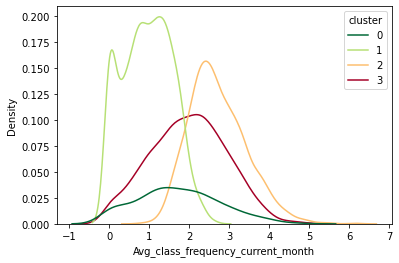

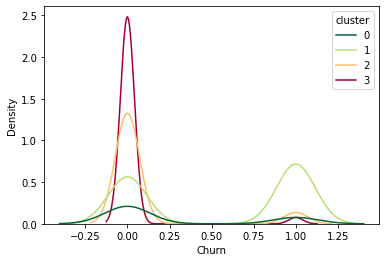

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



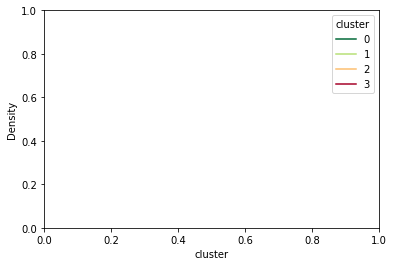

In [160]:
for col in gym:
    sns.kdeplot(data=gym, x=col, hue = 'cluster', palette='RdYlGn_r')
    plt.show()

We can see that users from cluster 1 are the most prone to churn. They have shorter contracts and a lower number of months until the end of the contract. They spend less and go to the gym less often. The proximity of the facility to home or work is important for users from all clusters. 

Cluster 3 includes users with the longest contracts

Cluster 1 is also more prone to outflow compared to clusters 2 and 3.

**Calculate the churn rate for each cluster** <a id='churn_clusters'></a>

Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [161]:
gym.pivot_table(
            index='cluster',
            values='Churn', 
            aggfunc=['count',
                     'sum', 
                     lambda x: round(((x == 0).sum() / x.count() - 1) * 100, 2)]).rename(
                    columns={'count':'Total', 'Churn':'', 'sum':'Left', '<lambda>':'Churn_rate,%'}).reset_index()

,cluster,Total,Left,"Churn_rate,%"
,,,,
0,0,386,103,-26.68
1,1,1479,828,-55.98
2,2,1057,98,-9.27
3,3,1078,32,-2.97


The cluster with the highest Churn_rate is cluster 1 (58%), followed by cluster 0 (28.5%). The most regular customers were in clusters 2 and 3, the Churn_rate in these clusters is 9% and 3.9%, respectively.


[To the Table of Contents](#back)   

# Step 5. Conclusions and basic recommendations <a id='conclusions'></a>

There is a necessity to pay attention to users who are at risk of leaving. Also it's a good idea not to forget about those who participates on regular basis.

From the analysis above we have noticed that the lenght of the contract as well as amount of months till the end of it play an important role in retention of users - so it's necessary to suggest clients profitable long-term contracts, increase engagements and check for the errors on the part of the client service. If a client doesn't come to the gym for a couple of weeks it is worth ask him why.

Loyal users are also a subject for higher engagement - some addittional activities, new bonuses included to contracts, discounts, fresh offers - all that could help in client retention. The opportunity to receive profitable contract will motivate users to stay.

[To the Table of Contents](#back)   